AttributeError: module 'pandas' has no attribute 'feature_names'

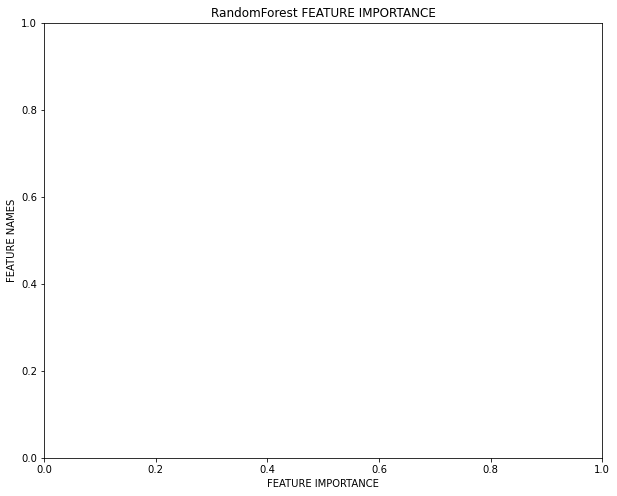

ValueError: arrays must all be same length

                   importance
age                  0.259181
OTStotalscore        0.184960
gradeVA              0.147688
type                 0.069980
zone                 0.063842
RD                   0.058093
RAPD                 0.053833
traumaticcataract    0.051490
gender               0.049044
FB                   0.031198
TON                  0.020275
Endophthalmitis      0.010415


<ipython-input-5-a3be94381ddf>:63: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(range(len(X.columns)), [val[0] for val in sorted_importances], color='rgbkymc', align='center')


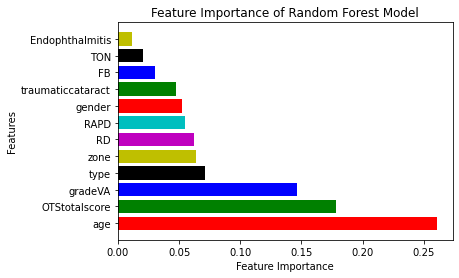

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt

def convert(data):
    number = preprocessing.LabelEncoder()
    data['age'] = number.fit_transform(data.age)
    data['gender'] = number.fit_transform(data.gender)
    data['type'] = number.fit_transform(data.type)
    data['gradeVA'] = number.fit_transform(data.gradeVA)
    data['RAPD'] = number.fit_transform(data.RAPD)
    data['zone'] = number.fit_transform(data.zone)
    data['traumaticcataract'] = number.fit_transform(data.traumaticcataract)
    data['TON'] = number.fit_transform(data.TON)
    data['FB'] = number.fit_transform(data.FB)
    data['RD'] = number.fit_transform(data.RD)
    data['Endophthalmitis'] = number.fit_transform(data.Endophthalmitis)
    data['OTStotalscore'] = number.fit_transform(data.OTStotalscore)   
    data=data.fillna(-999)
    return data

df = pd.read_csv("ogithreeCat.csv")
df=convert(df)



X = df.drop('lastFUBGrade', axis=1)
y = df['lastFUBGrade']


rf = RandomForestClassifier()


rf.fit(X, y)


feature_importances = pd.DataFrame(rf.feature_importances_,
                                  index = X.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)


print(feature_importances)


data = pd.read_csv("ogithreeCat.csv")
data = convert (data)

X = data.drop('lastFUBGrade', axis=1)
y = data['lastFUBGrade']


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)


importances = model.feature_importances_


sorted_importances = sorted(zip(importances, X.columns), reverse=True)


plt.barh(range(len(X.columns)), [val[0] for val in sorted_importances], color='rgbkymc', align='center')
plt.yticks(range(len(X.columns)), [val[1] for val in sorted_importances])
plt.title('Feature Importance of Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()